In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Tutorial developed from Medium article
["Introduction to Supervised Learning with Python: Scikit-Learn Tutorial](https://medium.com/@mwitiderrick/introduction-to-supervised-learning-with-python-scikit-learn-tutorial-966457dd33b9)

# Loading the Data

Using USA Housing dataset available at
[Kaggle](https://www.kaggle.com/vedavyasv/usa-housing/data#USA_Housing.csv).  Download the data set, unzip
it, and put it into your data directory (or change path appropriately to read
the csv file).

In [2]:
# load the data
df = pd.read_csv('data/USA_Housing.csv')

In [3]:
display(df.info())
display(df.columns)
display(df.describe())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


None

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


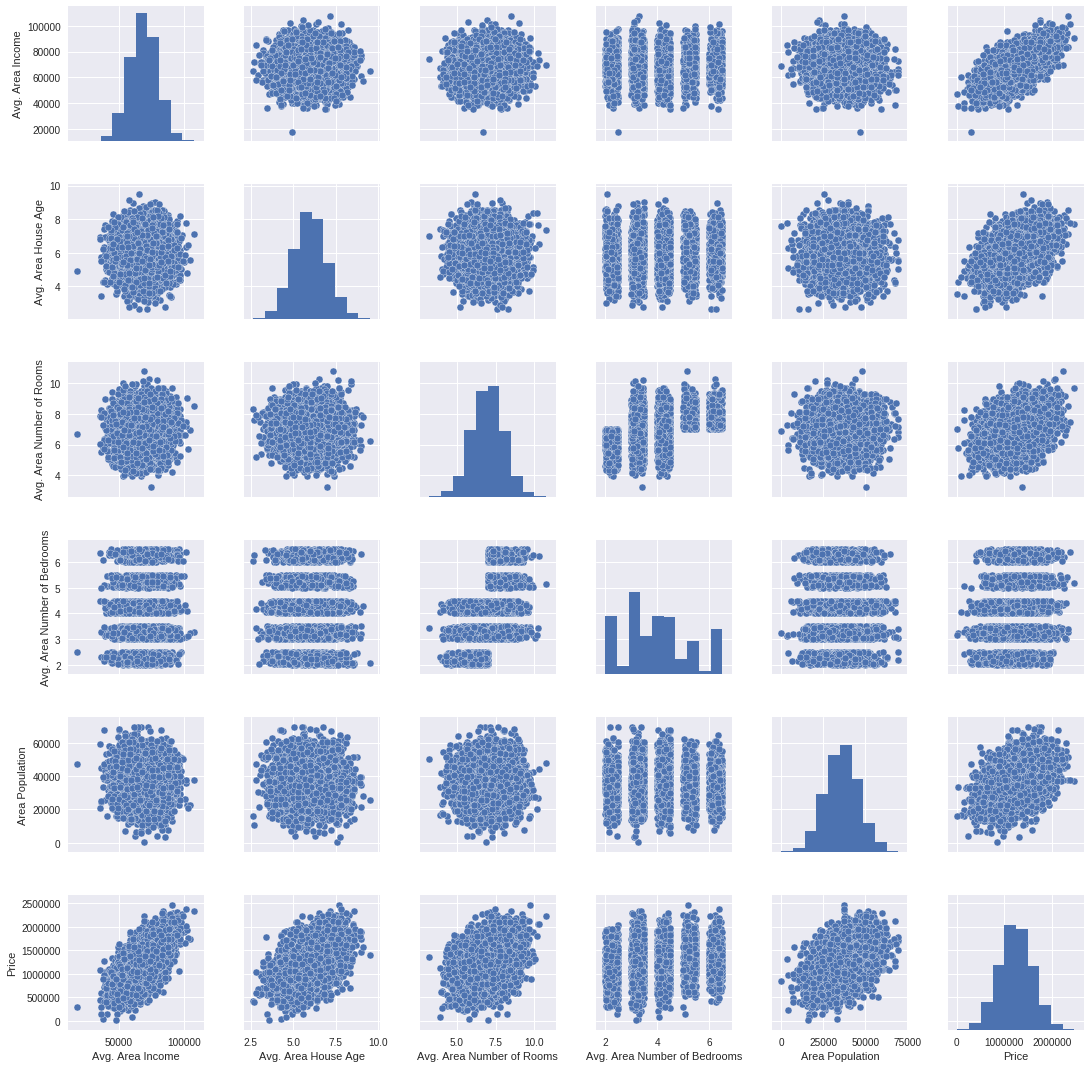

In [4]:
sns.pairplot(df);

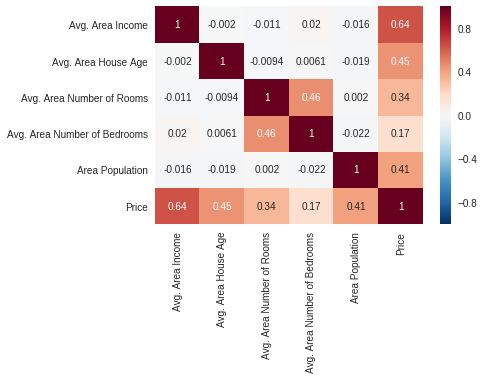

In [5]:
sns.heatmap(df.corr(), annot=True);

# Selection of Features

- drop Price, because that is actually the target we wish to predict or model.
- drop Address, because this is a textual field.  If we want to use this
  information in a machine model, we will need to transform it into
  numerical information (we could turn it into a gps coordinate, for example,
  but would this really give us any better information than the existing
  features?)

In [6]:
# selection of features
X = df.drop(['Price', 'Address'], axis=1)
display(X.columns)

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [7]:
# the targets for our models will be in y
y = df['Price']
display(y.describe())

count    5.000000e+03
mean     1.232073e+06
std      3.531176e+05
min      1.593866e+04
25%      9.975771e+05
50%      1.232669e+06
75%      1.471210e+06
max      2.469066e+06
Name: Price, dtype: float64

# Create Training and Test Sets

An example of using utility functions from `sklearn` for a simple train/test
split of the data.

In [8]:
from sklearn.model_selection import train_test_split

# use 30% for the test data, and 70% for the training
# set random_state seed, so we can recreate this exact same train/test
# split if needed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(3500, 5)

(3500,)

(1500, 5)

(1500,)

# Create and Train a Linear Regression Model

An example of creating a simple linear regression model using the `sklearn`
framework.  

All basic models in `sklearn` are objects that have the following member
functions:

- fit() Train model with input data (X) to fit the training data (y)
- predict() Given a trained model, predict the target value on (possibly new
  and unseen) data.

In [9]:
from sklearn.linear_model import LinearRegression

# create our model instance object
lm = LinearRegression()

# train the model to predict using the training data
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Linear Regression Model Evaluation

Evaluate how well this model performs.

The coefficients are the learned theta parameters of the linear
regression model. 

In [10]:
display(lm.coef_)

# trick to display the coefficient associated with each feature
# put back into a DataFrame, and specify the column names from X
coeff = pd.DataFrame(lm.coef_, X.columns, columns=['coefficients'])
display(coeff)

array([  2.16257989e+01,   1.65590393e+05,   1.19827783e+05,
         2.36109526e+03,   1.52165814e+01])

,coefficients
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


Now we make predictions, using the predict() function.  Here we make predictions
of the held back test data.

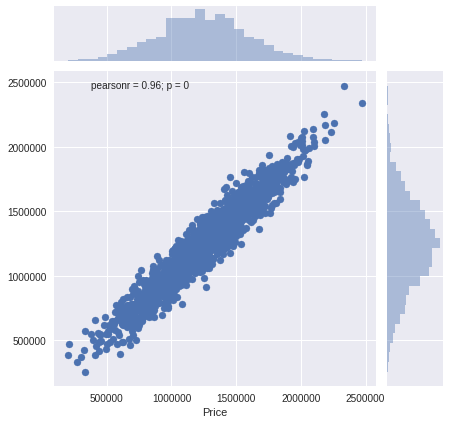

In [11]:
predictions = lm.predict(X_test)

# visualize the predictions, perfect predictions would show as
# a perfectly straight line,, where each predictions exactly matched
# the true value of y_test
sns.jointplot(y_test, predictions);

As we discussed a bit in previous lectures, residuals are important information
in evaluating the performance of a model.  If the residuals are not
normally distributed, this probably indicates that the model (a linear
model in this case) is not appropriate for this data.

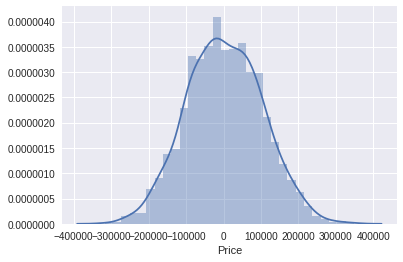

In [12]:
sns.distplot( (y_test - predictions), bins=30);

Use evaluation metrics to evaluate the linear regression model.

In [13]:
from sklearn import metrics

print('Mean Absolute Error      (MAE): ', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error       (MSE): ', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error      (MAE):  81135.5660934
Mean Squared Error       (MSE):  10068422551.4
Root Mean Squared Error (RMSE):  100341.529545


# Create and Train a Logistic Regression Model

The previous dataset was a regression problem (predicting a real valued
price).  So we will need a different dataset for a logistic regression
example.  But, as you will see, the framework of creating, fitting and
evaluating the model remains the same.

The kyphosis dataset is also available from kaggle.  You will need to
download it and unzip it to the correct location once again in order
to use it for the next examples.

The kyphosis column in the data set is a binary category (present or absent)
that is what we want to model and predict for this data.

In [14]:
# read in the data set
kyphosis = pd.read_csv('data/kyphosis.csv')

display(kyphosis.info())
display(kyphosis.columns)
display(kyphosis.describe())
display(kyphosis.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


None

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [15]:
# select the features for training
# and do a train/test split
X = kyphosis.drop(['Kyphosis'], axis=1)
y = kyphosis['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(56, 3)

(56,)

(25, 3)

(25,)

In [16]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# after fitting model, use predict to predict the labels of test data
k_pred = lr.predict(X_test)
display(k_pred)

array(['absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent', 'absent'], dtype=object)

In [18]:
# evaluate the model
from sklearn.metrics import classification_report, confusion_matrix

display(confusion_matrix(y_test, k_pred))

array([[18,  1],
       [ 4,  2]])

In [19]:
print(classification_report(y_test, k_pred))

             precision    recall  f1-score   support

     absent       0.82      0.95      0.88        19
    present       0.67      0.33      0.44         6

avg / total       0.78      0.80      0.77        25



# Decision Tree and Random Forest Models

In [20]:
# train and fit a decision tree model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
# evaluate the model
dt_pred = dt.predict(X_test)

display(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))

array([[16,  3],
       [ 3,  3]])

             precision    recall  f1-score   support

     absent       0.84      0.84      0.84        19
    present       0.50      0.50      0.50         6

avg / total       0.76      0.76      0.76        25



In [22]:
# train and fit a random forest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [23]:
# evaluate the model
rfc_pred = rfc.predict(X_test)

display(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

array([[17,  2],
       [ 4,  2]])

             precision    recall  f1-score   support

     absent       0.81      0.89      0.85        19
    present       0.50      0.33      0.40         6

avg / total       0.74      0.76      0.74        25



In [24]:
%load_ext version_information

%version_information numpy, scipy, matplotlib, pandas, sklearn

Software versions
Python 3.6.1 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 6.4.0
OS Linux 4.13.0 46 generic x86_64 with debian stretch sid
numpy 1.12.1
scipy 0.19.0
matplotlib 2.0.2
pandas 0.20.1
sklearn 0.18.1
Wed Sep 12 17:14:30 2018 CDT